## Stock Market Portfolio Optimization: Getting Started
Stock market portfolio optimization involves analyzing price trends, calculating expected returns and volatilities, and determining the correlations between different stocks to achieve diversification
### Goal
The expected results from stock market portfolio optimization include identifying the portfolio with the highest Sharpe ratio, which indicates the best risk-adjusted return and provides a clear allocation strategy for the selected stocks to achieve long-term investment goals.


In [1]:
pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 29.4 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.6/84.6 kB 2.6 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.6-cp310-cp310-linux_x86_64.whl size=293632 sha256=963badb519b8e8a37971050b1a082a609b40dc8d4e09165534b41ddb4bfa40a2
  Stored in directory: /root/.cache/pip/wheels/4b/b9/b0/83d6e258e8f963f5ff111a2cd8c483ca59372a86e6a2535212
Successfully built peewee
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import yfinance as yf
from datetime import date, timedelta

end_date = date.today().strftime("%Y-%m-%d")
start_date = (date.today() - timedelta(days=365)).strftime("%Y-%m-%d")

tickers = ['RELIANCE.NS', 'TCS.NS', 'INFY.NS', 'HDFCBANK.NS']

data = yf.download(tickers, start=start_date, end=end_date, progress=False)

print("DataFrame before reset_index():")
print(data.head())
print(data.columns)

data = data.reset_index()

print("\nDataFrame after reset_index():")
print(data.head())
print(data.columns)


DataFrame before reset_index():
Price                        Adj Close                                         \
Ticker                     HDFCBANK.NS      INFY.NS  RELIANCE.NS       TCS.NS   
Date                                                                            
2023-09-11 00:00:00+00:00  1609.817261  1437.161499  2466.229736  3422.769775   
2023-09-12 00:00:00+00:00  1614.848511  1461.155396  2430.600586  3521.254395   
2023-09-13 00:00:00+00:00  1621.754272  1458.478638  2442.759277  3508.520020   
2023-09-14 00:00:00+00:00  1620.767700  1466.849854  2445.001709  3500.849609   
2023-09-15 00:00:00+00:00  1639.363770  1471.376099  2449.536377  3538.463867   

Price                            Close                                         \
Ticker                     HDFCBANK.NS      INFY.NS  RELIANCE.NS       TCS.NS   
Date                                                                            
2023-09-11 00:00:00+00:00  1631.800049  1476.449951  2474.600098  3480.64990

In [3]:
import pandas as pd
import yfinance as yf
from datetime import date, timedelta

# define the time period for the data
end_date = date.today().strftime("%Y-%m-%d")
start_date = (date.today() - timedelta(days=365)).strftime("%Y-%m-%d")

# list of stock tickers to download
tickers = ['RELIANCE.NS', 'TCS.NS', 'INFY.NS', 'HDFCBANK.NS']

# Download stock data for multiple tickers
data = yf.download(tickers, start=start_date, end=end_date, progress=False)

# reset index to bring Date into the columns for the melt function
data = data.reset_index()

# Flatten the MultiIndex columns
data.columns = ['_'.join(col).strip() if col[1] else col[0] for col in data.columns]


# Melt the DataFrame to make it long format
data_melted = data.melt(id_vars=['Date'], var_name='Ticker_Attribute')

# Split the 'Ticker_Attribute' column into 'Attribute' and 'Ticker'
data_melted[['Attribute', 'Ticker']] = data_melted['Ticker_Attribute'].str.split('_', expand=True)

# Pivot the melted DataFrame to have the attributes (Open, High, Low, etc.) as columns
data_pivoted = data_melted.pivot_table(index=['Date', 'Ticker'], columns='Attribute', values='value', aggfunc='first')

# reset index to turn multi-index into columns
stock_data = data_pivoted.reset_index()

print(stock_data.head())


Attribute                      Date       Ticker    Adj Close        Close  \
0         2023-09-11 00:00:00+00:00  HDFCBANK.NS  1609.817261  1631.800049   
1         2023-09-11 00:00:00+00:00      INFY.NS  1437.161499  1476.449951   
2         2023-09-11 00:00:00+00:00  RELIANCE.NS  2466.229736  2474.600098   
3         2023-09-11 00:00:00+00:00       TCS.NS  3422.769775  3480.649902   
4         2023-09-12 00:00:00+00:00  HDFCBANK.NS  1614.848511  1636.900024   

Attribute         High          Low         Open      Volume  
0          1636.500000  1624.000000  1628.900024  15786511.0  
1          1478.050049  1464.500000  1469.599976   4182226.0  
2          2476.850098  2452.000000  2452.000000   6635537.0  
3          3485.699951  3445.000000  3462.000000   1783604.0  
4          1642.900024  1625.050049  1640.000000  19516670.0  


In [4]:
stock_data

Attribute,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2023-09-11 00:00:00+00:00,HDFCBANK.NS,1609.817261,1631.800049,1636.500000,1624.000000,1628.900024,15786511.0
1,2023-09-11 00:00:00+00:00,INFY.NS,1437.161499,1476.449951,1478.050049,1464.500000,1469.599976,4182226.0
2,2023-09-11 00:00:00+00:00,RELIANCE.NS,2466.229736,2474.600098,2476.850098,2452.000000,2452.000000,6635537.0
3,2023-09-11 00:00:00+00:00,TCS.NS,3422.769775,3480.649902,3485.699951,3445.000000,3462.000000,1783604.0
4,2023-09-12 00:00:00+00:00,HDFCBANK.NS,1614.848511,1636.900024,1642.900024,1625.050049,1640.000000,19516670.0
...,...,...,...,...,...,...,...,...
963,2024-09-05 00:00:00+00:00,TCS.NS,4475.950195,4475.950195,4499.000000,4454.149902,4481.000000,1688793.0
964,2024-09-06 00:00:00+00:00,HDFCBANK.NS,1636.949951,1636.949951,1647.750000,1634.099976,1638.300049,13014801.0
965,2024-09-06 00:00:00+00:00,INFY.NS,1901.849976,1901.849976,1936.500000,1896.849976,1922.000000,5848106.0
966,2024-09-06 00:00:00+00:00,RELIANCE.NS,2929.649902,2929.649902,2994.000000,2923.250000,2985.000000,9697114.0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

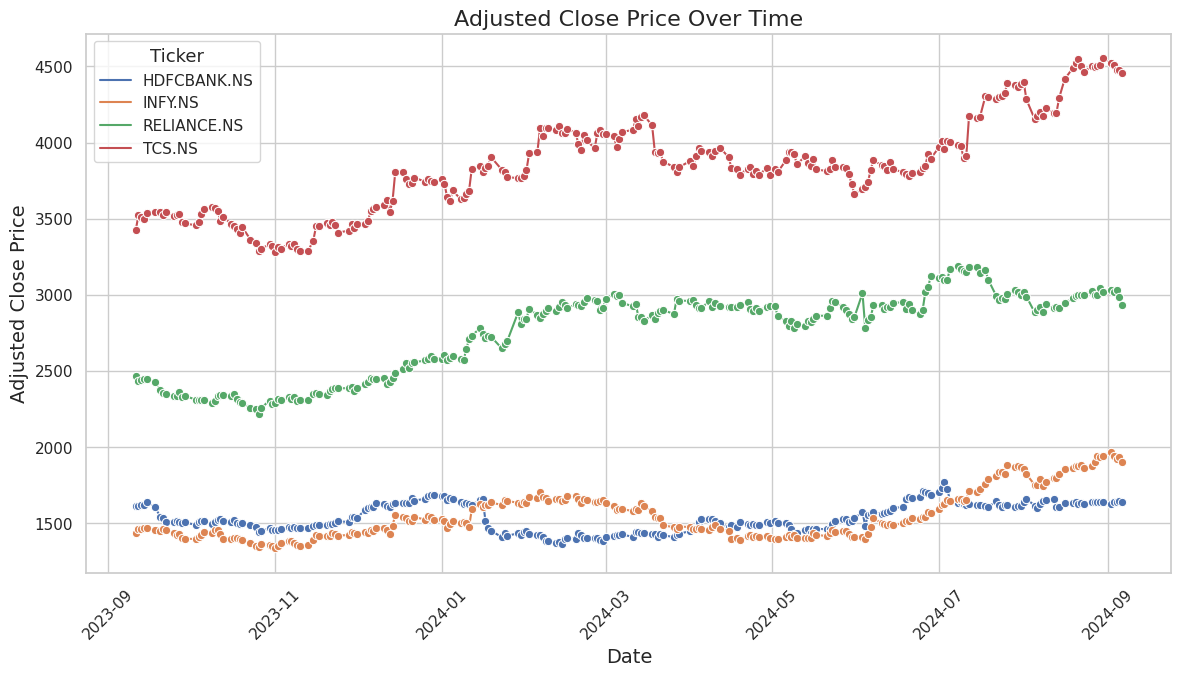

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

stock_data['Date'] = pd.to_datetime(stock_data['Date'])

stock_data.set_index('Date', inplace=True)
stock_data.reset_index(inplace=True)
plt.figure(figsize=(14, 7))
sns.set(style='whitegrid')

sns.lineplot(data=stock_data, x='Date', y='Adj Close', hue='Ticker', marker='o')

plt.title('Adjusted Close Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Adjusted Close Price', fontsize=14)
plt.legend(title='Ticker', title_fontsize='13', fontsize='11')
plt.grid(True)

plt.xticks(rotation=45)

plt.show()

## Let's understand this graph
The graph displays the adjusted close prices of four stocks (HDFCBANK.NS, INFY.NS, RELIANCE.NS, TCS.NS) over time from July 2023 to July 2024. It highlights that TCS has the highest adjusted close prices, followed by RELIANCE, INFY (Infosys), and HDFCBANK. The prices for RELIANCE and TCS show noticeable upward trends, which indicates strong performance, while HDFCBANK and INFY exhibit more stability with relatively lower price fluctuations.

Note: (Adjusted closing price is the closing price after dividend payouts, stock splits, or the issue of additional shares have been taken into account)

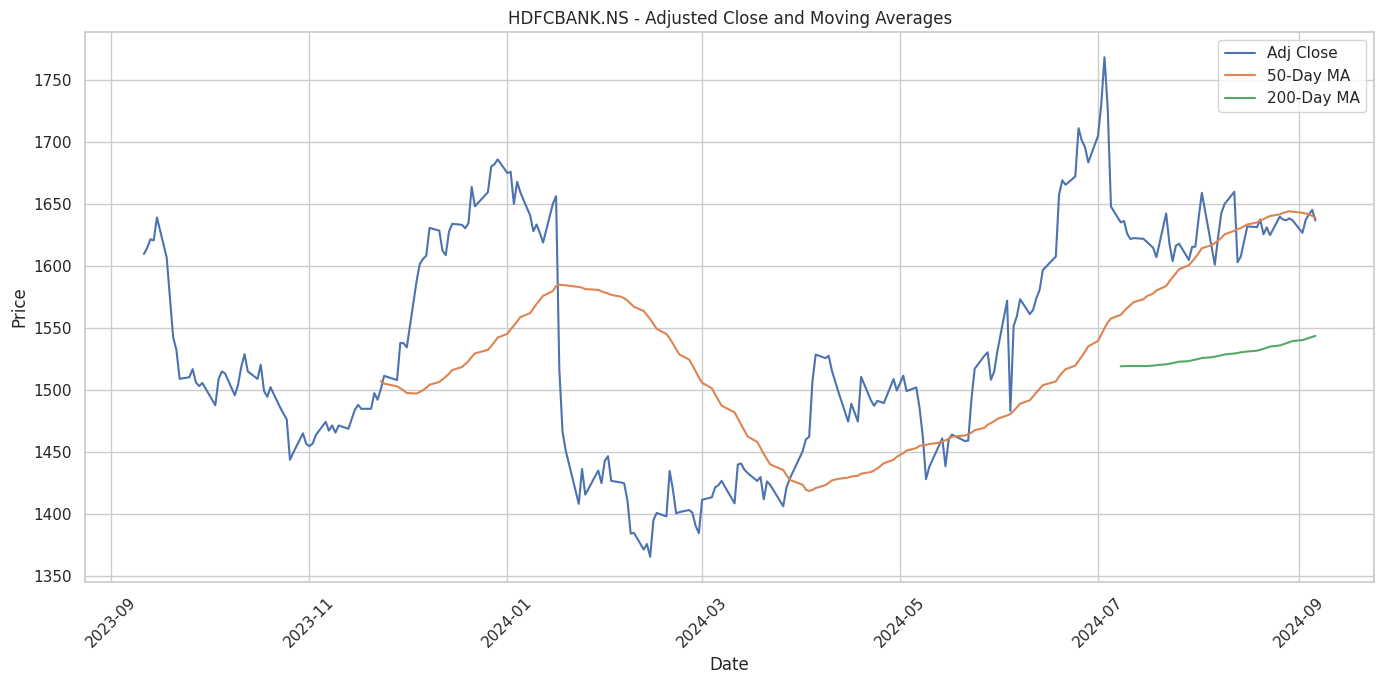

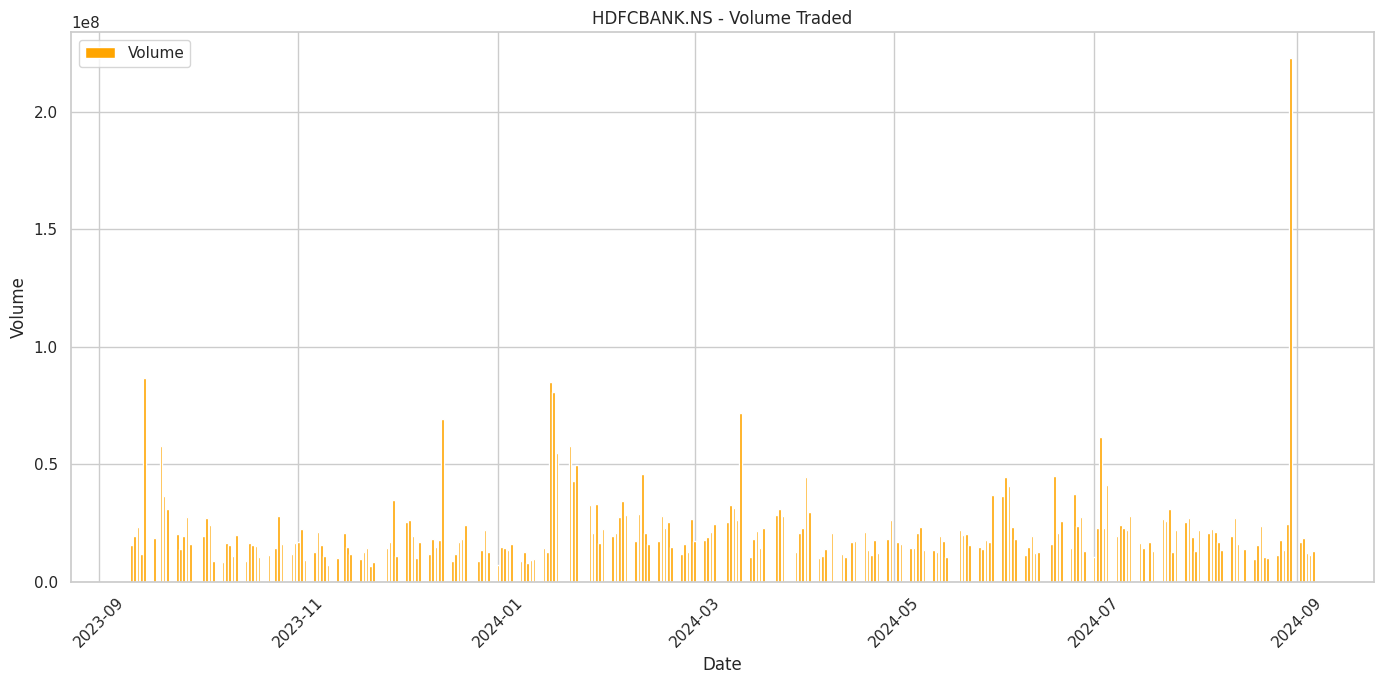

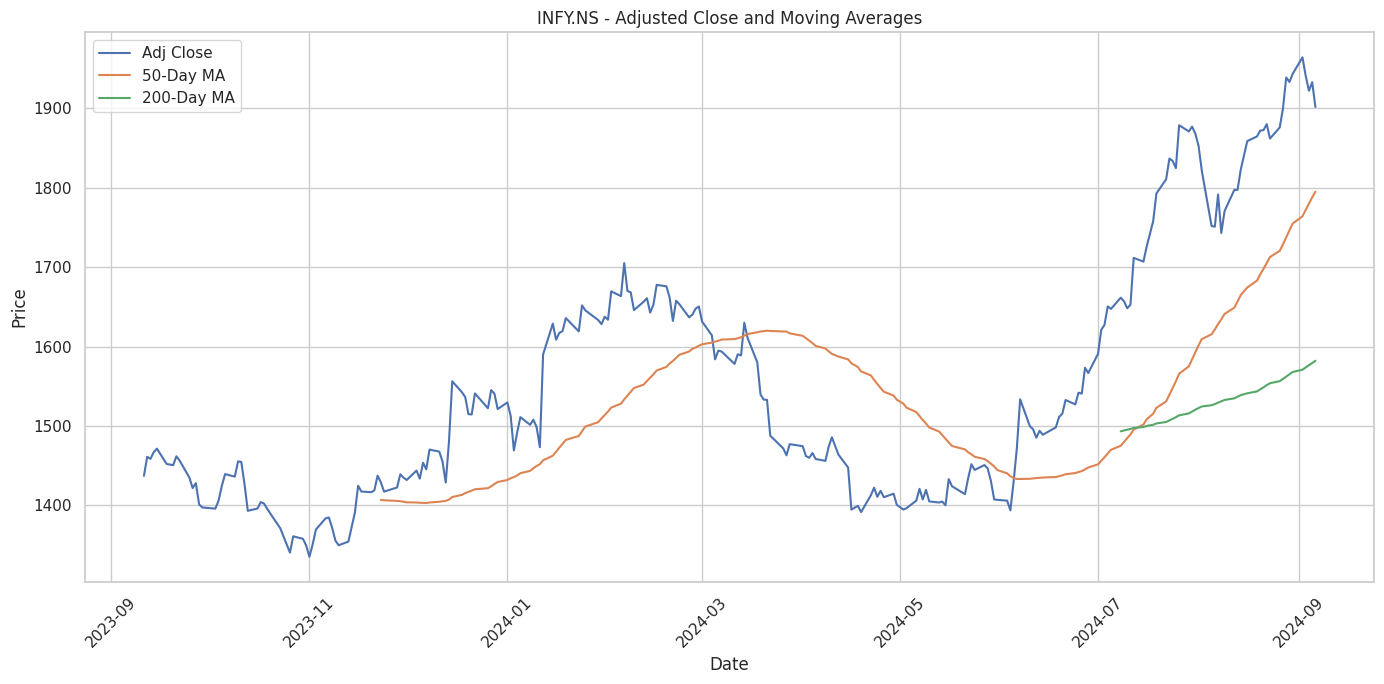

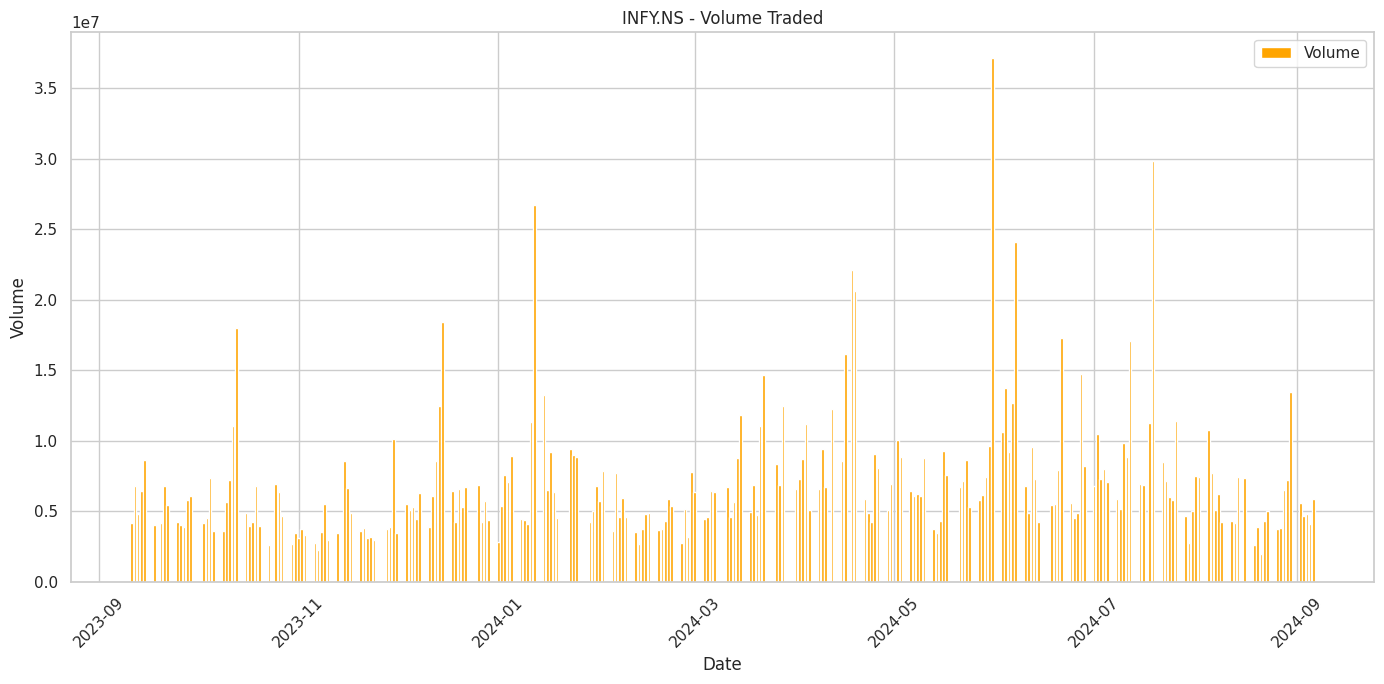

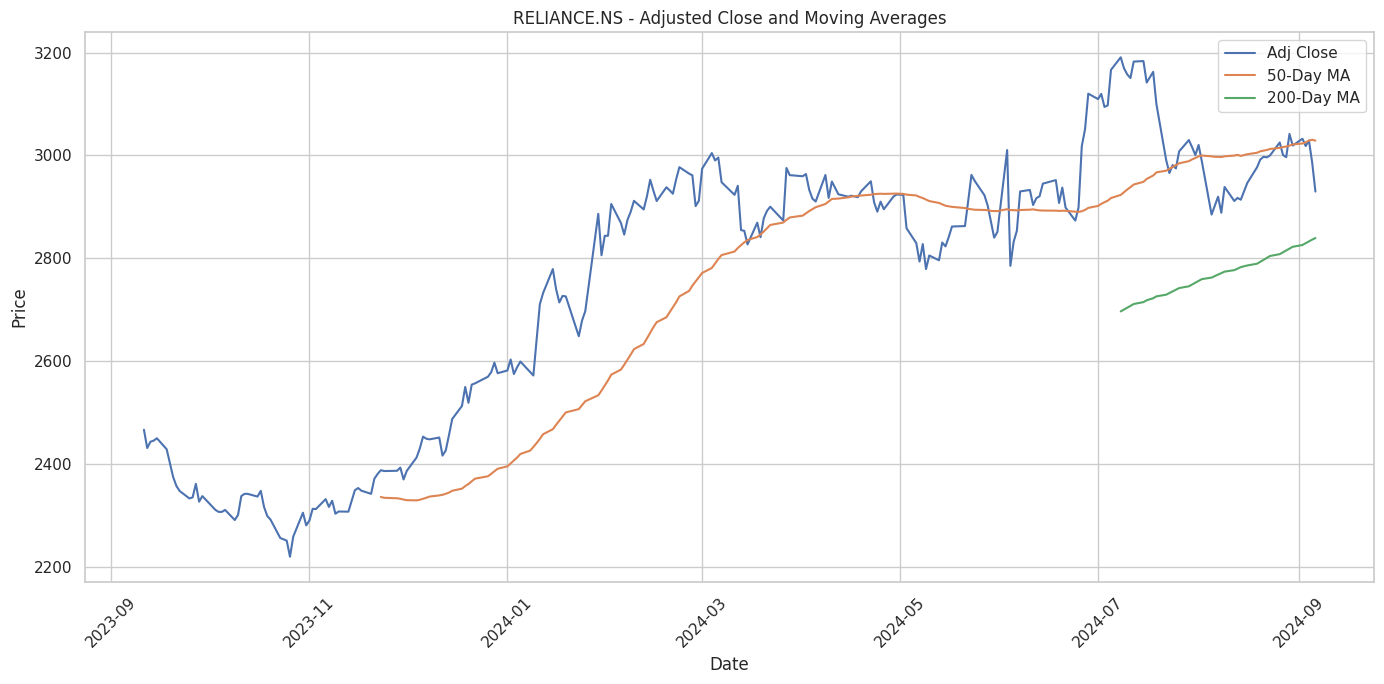

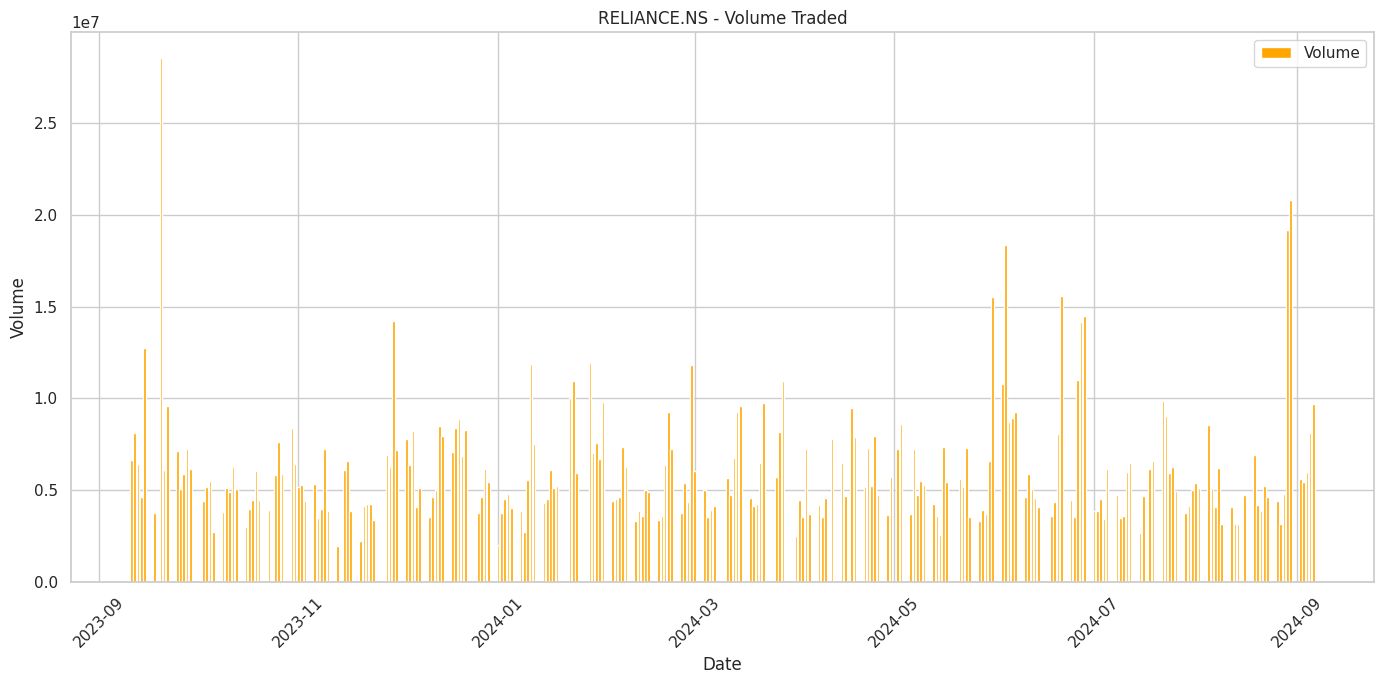

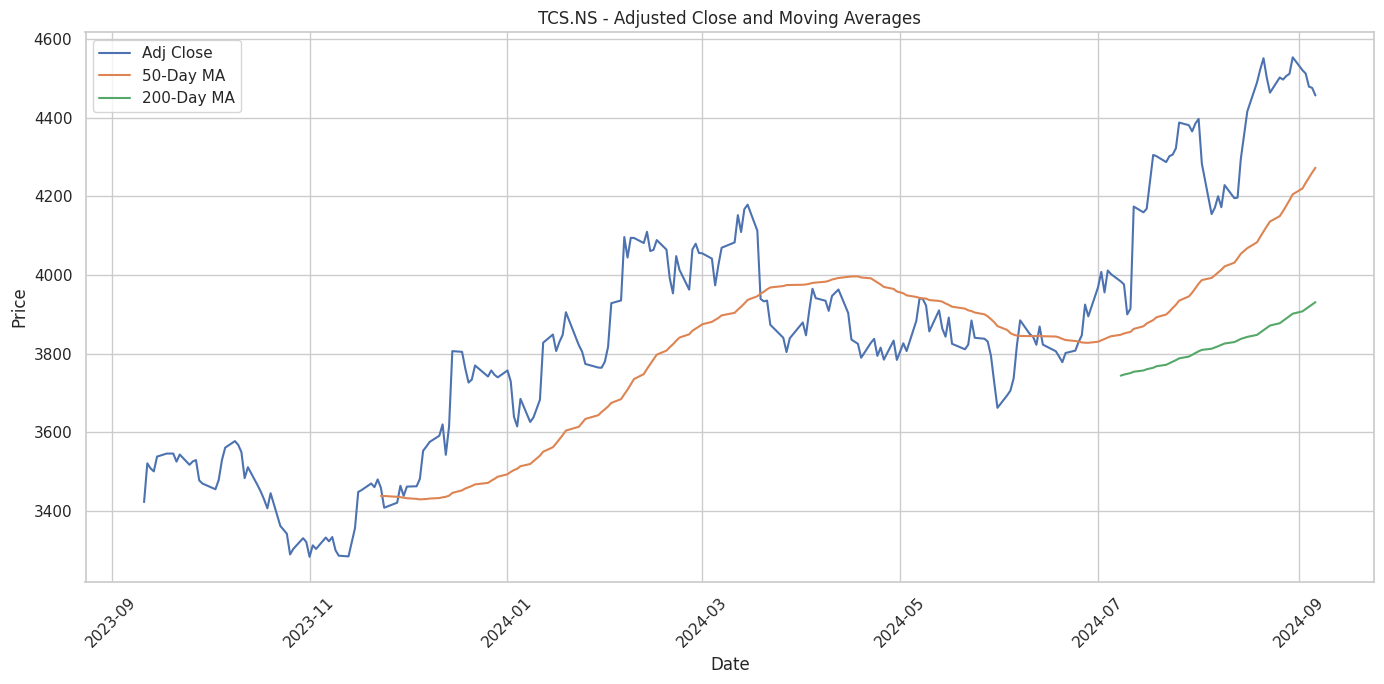

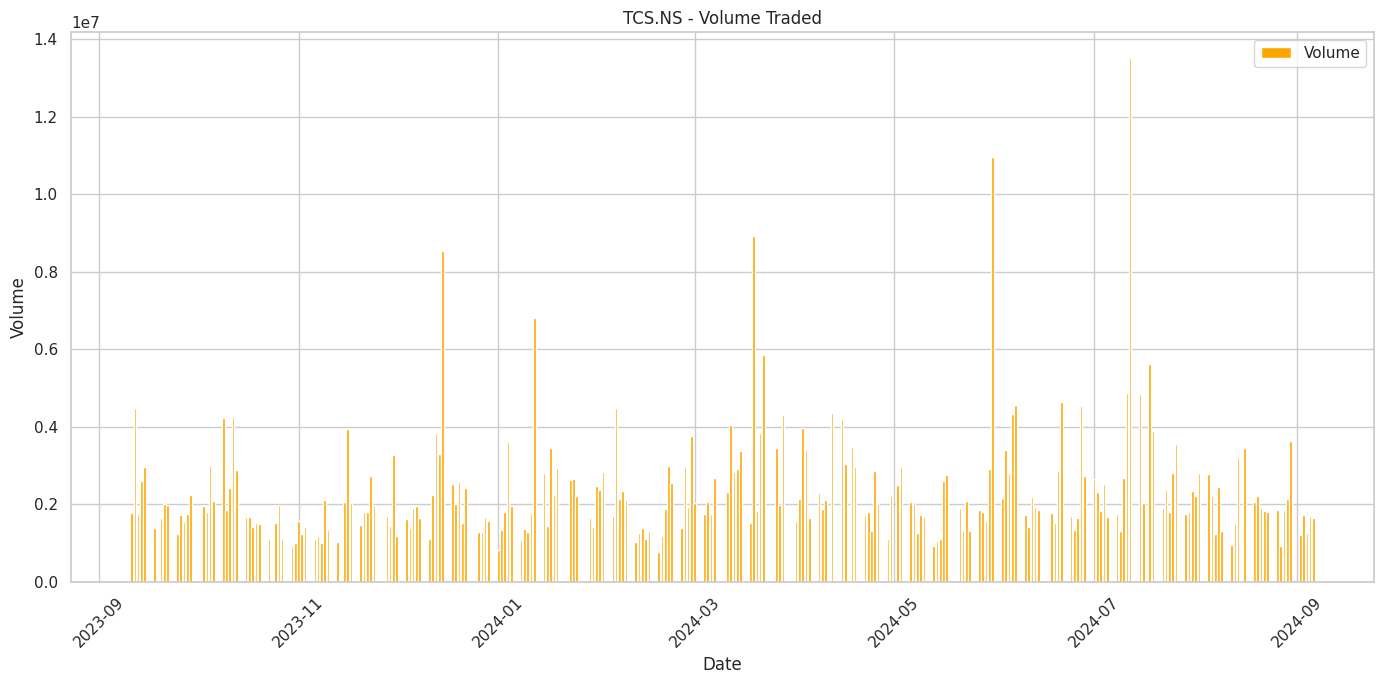

In [6]:
short_window = 50
long_window = 200
stock_data.set_index('Date',inplace=True)
unique_tickers = stock_data['Ticker'].unique()

for ticker in unique_tickers:
    ticker_data = stock_data[stock_data['Ticker']==ticker].copy()
    ticker_data['50_MA'] = ticker_data['Adj Close'].rolling(window=short_window).mean()
    ticker_data['200_MA'] = ticker_data['Adj Close'].rolling(window=long_window).mean()
    
    plt.figure(figsize=(14, 7))
    plt.plot(ticker_data.index, ticker_data['Adj Close'], label='Adj Close')
    plt.plot(ticker_data.index, ticker_data['50_MA'], label='50-Day MA')
    plt.plot(ticker_data.index, ticker_data['200_MA'], label='200-Day MA')
    plt.title(f'{ticker} - Adjusted Close and Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(14, 7))
    plt.bar(ticker_data.index, ticker_data['Volume'], label='Volume', color='orange')
    plt.title(f'{ticker} - Volume Traded')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Let's Understand
For HDFCBANK and INFY, the prices initially decline but later show signs of recovery, as indicated by the moving averages. RELIANCE and TCS display a more consistent upward trend in their adjusted close prices. The volume traded graphs highlight significant trading activity at various points, with spikes indicating high trading volumes, particularly noticeable in HDFCBANK and RELIANCE around early 2024. These insights are crucial for understanding price movements and trading behaviours, which assist in making informed investment decisions

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

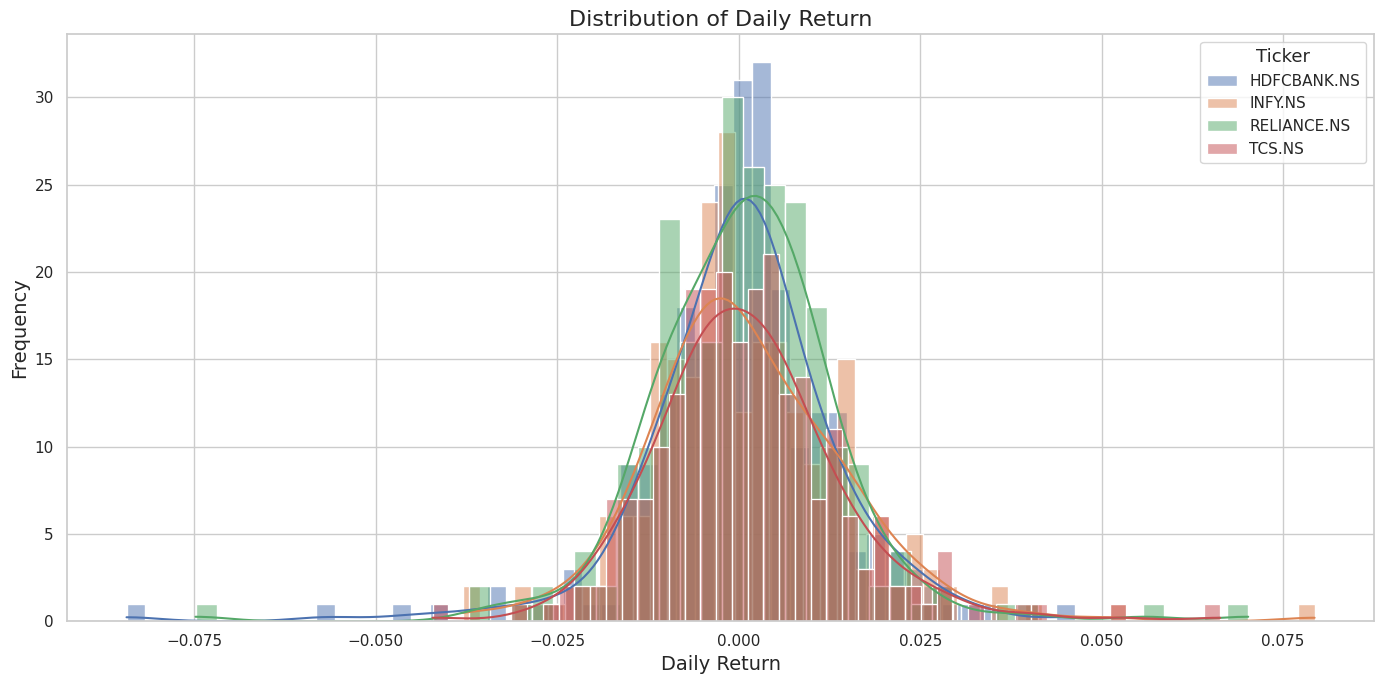

In [7]:
stock_data['Daily Return'] = stock_data.groupby('Ticker')['Adj Close'].pct_change()

plt.figure(figsize=(14,7))
sns.set(style='whitegrid')

for ticker in unique_tickers:
    ticker_data = stock_data[stock_data['Ticker']==ticker]
    sns.histplot(ticker_data['Daily Return'].dropna(),bins=50,kde=True,label=ticker,alpha=0.5)

plt.title('Distribution of Daily Return',fontsize=16)
plt.xlabel('Daily Return',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.legend(title='Ticker',title_fontsize='13',fontsize='11')
plt.grid(True)
plt.tight_layout()
plt.show()

## Let's Understand:
The distributions are approximately normal, centred around zero, which indicates that most daily returns are close to the average return. However, there are tails on both sides, which reflect occasional significant gains or losses. INFY and RELIANCE appear to have slightly wider distributions, which suggests higher volatility compared to HDFCBANK and TCS.

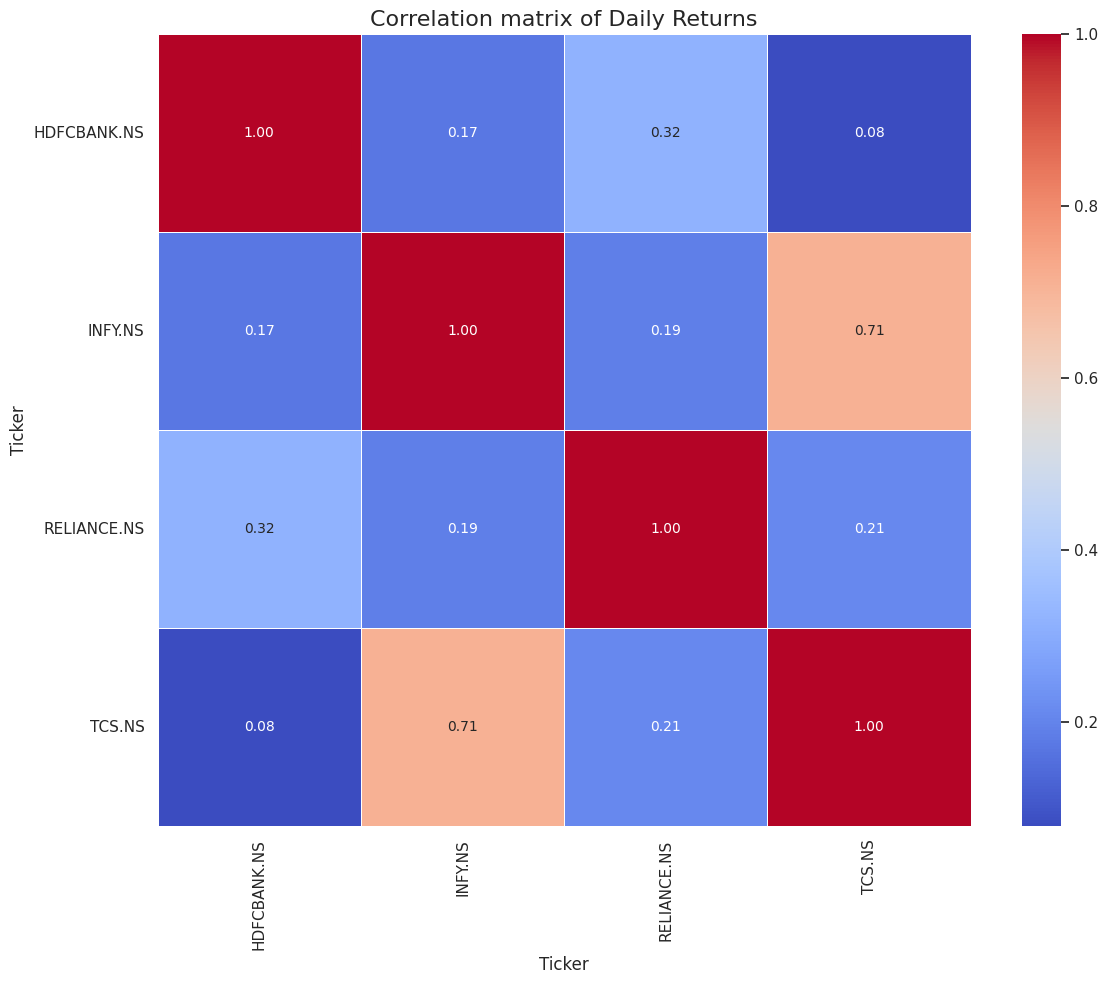

In [8]:
daily_returns = stock_data.pivot_table(index='Date',columns='Ticker',values='Daily Return')
correlation_matrix = daily_returns.corr()

plt.figure(figsize=(12,10))
sns.set(style='whitegrid')

sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',linewidths=.5,fmt='.2f',annot_kws={"size":10})
plt.title('Correlation matrix of Daily Returns',fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Let's Understand:
NFY and TCS have a high positive correlation (0.71), which indicates that they tend to move in the same direction. HDFCBANK has a moderate positive correlation with RELIANCE (0.32) and a low correlation with INFY (0.17) and TCS (0.08). RELIANCE shows a low correlation with INFY (0.19) and TCS (0.21). These varying correlations suggest potential diversification benefits; combining stocks with lower correlations can reduce overall portfolio risk

Now from the above understanding let's do some more operations like:

1. Calculate the expected returns and volatility for each stock.
2. Generate a series of random portfolios to identify the efficient frontier.
3. Optimize the portfolio to maximize the Sharpe ratio, which is a measure of risk-adjusted return.

In [9]:
import numpy as np

expected_returns = daily_returns.mean()*252 #Annualising the returns
volatility = daily_returns.std()*np.sqrt(252) # annualising the volatility

stock_stats = pd.DataFrame({
    'Expected Return':expected_returns,
    'Volatility':volatility
})
stock_stats

,Expected Return,Volatility
Ticker,,
HDFCBANK.NS,0.041195,0.216907
INFY.NS,0.317607,0.222838
RELIANCE.NS,0.203043,0.214643
TCS.NS,0.297478,0.207724


## Understanding this:
INFY has the highest expected return (32.11%) and highest volatility (22.24%), which indicates a potentially high-reward investment with relatively higher risk. RELIANCE and TCS also have high expected returns (21.34% and 30.55% respectively) with moderate volatility (21.44% and 20.73%). HDFCBANK has the lowest expected return (4.64%) and moderate volatility (21.65%), which makes it the least attractive in terms of risk-adjusted returns.

### Note:
Expected Return reflects the average anticipated return from an asset or portfolio.
Volatility measures the risk or variability of those returns.

The expected return is the average return an investor anticipates to earn from an asset or portfolio over a given period, based on historical performance or probability forecasts.

Volatility measures the degree of variation of the returns of an asset over time. It represents the risk or uncertainty associated with the price fluctuations of the asset.

## Up next:
Let's generate a large number of random portfolio weights. Calculate the expected return and volatility for each portfolio. Plot these portfolios to visualize the efficient frontier

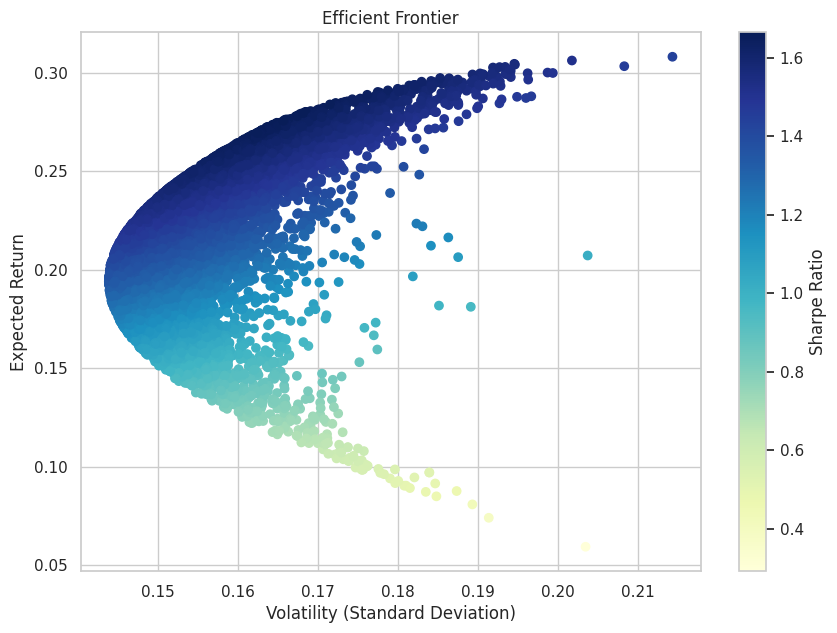

In [10]:
#function to calculate protfoli performance
def portfolio_performance(weights,returns,cov_matrix):
    portfolio_return = np.dot(weights,returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T,np.dot(cov_matrix,weights)))
    return portfolio_return,portfolio_volatility

#number of portfolios to simulate
num_portfolios = 10000

#arrays to store the results
results = np.zeros((3,num_portfolios))

#annualized covariance matrix
cov_matrix = daily_returns.cov()*252

np.random.seed(42)

for i in range(num_portfolios):
    weights = np.random.random(len(unique_tickers))
    weights/= np.sum(weights)
    
    portfolio_return ,portfolio_volatility = portfolio_performance(weights,expected_returns,cov_matrix)
    
    results[0,i] = portfolio_return 
    results[1,i] = portfolio_volatility
    results[2,i] = portfolio_return/portfolio_volatility #harpe Ratio
    
plt.figure(figsize=(10,7))
plt.scatter(results[1,:],results[0,:],c=results[2,:],cmap='YlGnBu',marker='o')
plt.title('Efficient Frontier')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')
plt.grid(True)
plt.show()

### Let's Understand:
Each dot represents a portfolio, with the colour indicating the Sharpe ratio, a measure of risk-adjusted return. Portfolios on the leftmost edge of the frontier (closer to the y-axis) offer the highest expected returns for a given level of volatility, which represent optimal portfolios. The gradient shows that portfolios with higher Sharpe ratios (darker blue) provide better risk-adjusted returns

In [11]:
#Here's how to identify the portfolio with the maximum sharpe ratio:
max_sharpe_idx = np.argmax(results[2])
print(f'Max sharpe index: {max_sharpe_idx}')
max_sharpe_return = results[0,max_sharpe_idx]
max_sharpe_volatility = results[1,max_sharpe_idx]
max_sharpe_ratio = results[2,max_sharpe_idx]

max_sharpe_return,max_sharpe_volatility,max_sharpe_ratio

Max sharpe index: 18


(0.2745463895704305, 0.1648838731446399, 1.665089401008867)

##### Next, let’s identify the weights of the stocks in the portfolio that yield the maximum Sharpe ratio

In [12]:
max_sharpe_weights = np.zeros(len(unique_tickers))

for i in range(num_portfolios):
    weights = np.random.random(len(unique_tickers))
    weights /= np.sum(weights)

    portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)

    if results[2, i] == max_sharpe_ratio:
        max_sharpe_weights = weights
        break

portfolio_weights_df = pd.DataFrame({
    'Ticker': unique_tickers,
    'Weight': max_sharpe_weights
})

portfolio_weights_df

,Ticker,Weight
0,HDFCBANK.NS,0.281504
1,INFY.NS,0.245652
2,RELIANCE.NS,0.268975
3,TCS.NS,0.203869
